# Inflation Notebook

    # Initial Setup
Define Libraries (Vars, tseries, forecast)
Define route of file
Create Object name "data" to load information.

In [421]:
# Clear workspace
rm(list = ls())
sessionInfo()

getwd()
# Set the working directory
setwd("C:/Users/srgen/OneDrive/Documentos/Applied Economics/Econometrics/Econometrics II class/Corona EcoII-2/Inflacion")
getwd()

libs <- c("vars","tseries","forecast","data.table")
class(libs)
length(libs)
for (i in libs) {
  if(!is.element(i,.packages(all.available = TRUE))) {
    install.packages(i,repos="https://cran.revolutionanalytics.com/")
  }
  library(i,character.only = TRUE)
}

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17134)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] data.table_1.11.4 forecast_8.6      tseries_0.10-46   vars_1.5-3       
 [5] lmtest_0.9-36     urca_1.3-0        strucchange_1.5-1 sandwich_2.4-0   
 [9] zoo_1.8-3         MASS_7.3-50      

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3      tidyselect_0.2.4  repr_0.15.0       purrr_0.2.5      
 [5] lattice_0.20-35   colorspace_1.3-2  htmltools_0.3.6   base64enc_0.1-3  
 [9] rlang_0.2.1       pillar_1.3.0      glue_1.3.0        TTR_0.23-3       
[13] bindrcpp_0.2.2    uuid_0.1-2       

[1] "C:/Users/srgen/OneDrive/Documentos/Applied Economics/Econometrics/Econometrics II class/Corona EcoII-2/Inflacion"

[1] "C:/Users/srgen/OneDrive/Documentos/Applied Economics/Econometrics/Econometrics II class/Corona EcoII-2/Inflacion"

[1] "character"

[1] 4

    #Ignor Warning Messages
    # Load data
The data set is integrated by:
1. INPC_anual: The Mexico's National Consumer Price Index to measure countrie's national inflation.
2. CETES_28: The Mexican 28 day Federal Treasury Certificates
time: from January 2005 to Abril 2019

In [422]:
path <-  "C:/Users/srgen/OneDrive/Documentos/Applied Economics/Econometrics/Econometrics II class/Corona EcoII-2/Inflacion/"
inf1 <- read.csv(paste(path, "Tabla para inflacion 2000-2019.csv", sep = ""), row.names = 1)


# Time Series Analysis
# Model Identification
Run correlation to identify relation among variables
Plot series to visualize 

,INPC_anual,CETES_28
INPC_anual,1.0000000,0.7923352
CETES_28,0.7923352,1.0000000


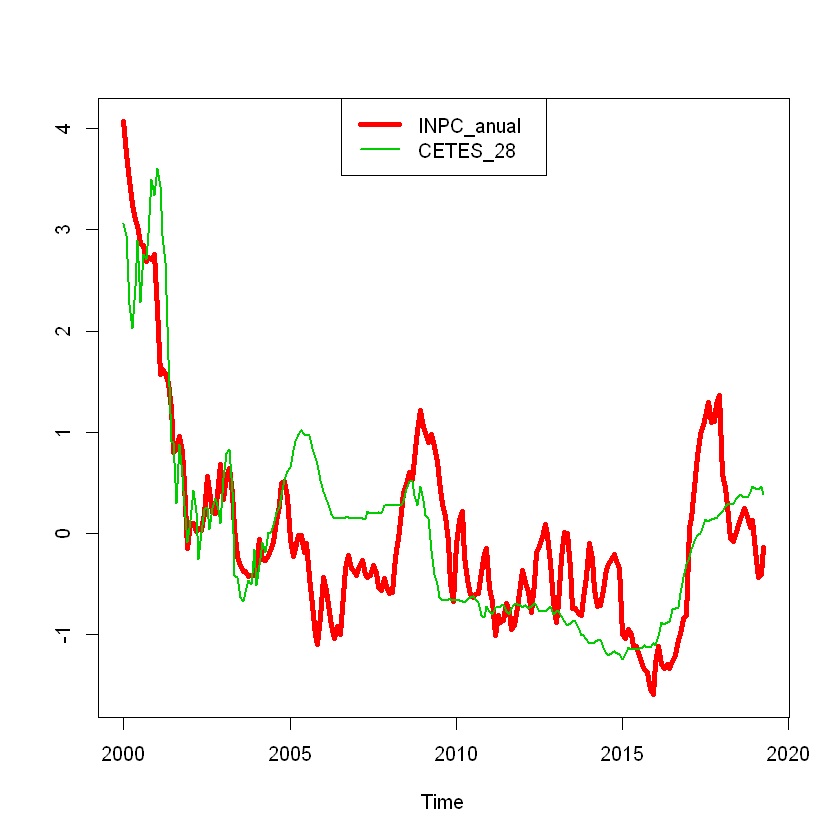

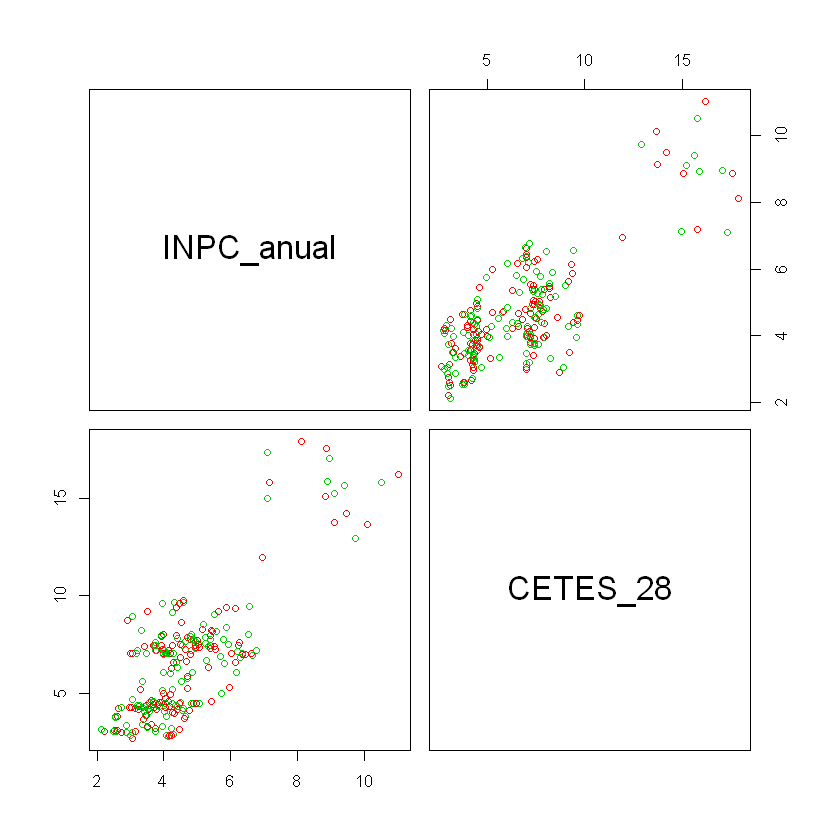

In [423]:
inf1<-ts(inf1, start=c(2000,1), frequency=12)
ts.plot(scale(inf1), col=c(2,rep(3,ncol(inf1)-1)), lwd=c(4,rep(2, ncol(inf1)-1)))
legend("top", colnames(inf1), col = c(2:3), lty = 1,lwd=c(4,rep(2, ncol(inf1)-1)))
cor(inf1)
pairs(inf1,col=c(2,rep(3,ncol(inf1)-1)))

# Observations
From Correlation, 0.79 we can identify a good series to analyze. This was guessed by the economic relation between Treasury Certificates as a response of Banxico to act on inflation stability.
From Plots, we can observe some tendency and correlation as well.

# Stationary and Cointegrated
Due to we need the Time Series to be stationary and cointegrated in order to proceed, we must run a Augmented Dickey Fuller Test in order to detect the presence of Unitary Roots.

In [424]:
#ADF test from {tseries} 
adf.p <- matrix(0, ncol(inf1), 2)
rownames(adf.p) <- colnames(inf1)
colnames(adf.p) <- c("l", "fd")

for(i in 1 : ncol(inf1)){
  adf.p[i, "l"] <- adf.test(inf1[,i])$p.value
  adf.p[i, "fd"] <- adf.test(diff(inf1[,i]))$p.value
}

#ADF test from {functions.r} developed by @drCorona 
path2<- "C:/Users/srgen/OneDrive/Documentos/Applied Economics/Econometrics/Econometrics II class/Corona EcoII-2/Clase 3 Cointegracion/"
source(paste(path2, "functions.r", sep=""))

adf_mat<- matrix (0, ncol(inf1),2)
rownames(adf_mat)<- colnames(inf1)
colnames(adf_mat)<- c("lvl","fd")
for(i in 1: ncol(inf1)){
  adf_mat[i,"lvl"]<-adf(inf1[,i], "none")$p.value
  adf_mat[i,"fd"]<-adf(diff(inf1[,i]), "none")$p.value
}
adf.p
adf_mat

Warning message in adf.test(diff(inf1[, i])):
"p-value smaller than printed p-value"Warning message in adf.test(diff(inf1[, i])):
"p-value smaller than printed p-value"Warning message in adf(diff(inf1[, i]), "none"):
"p-value smaller than printed p-value"Warning message in adf(diff(inf1[, i]), "none"):
"p-value smaller than printed p-value"

,l,fd
INPC_anual,0.05479361,0.01
CETES_28,0.40901916,0.01


,lvl,fd
INPC_anual,0.08364372,0.01
CETES_28,0.12449856,0.01


# Stationary and Cointegrated 2
Due to we've seen levels above 0.05, we shall transform the data series into a differentiated inter-annual logarithmic Time Series. The TS will be now called inf1_12 once its anualized

We expect levels below the 0.05

In [425]:
inf1_12<- diff(log(inf1),12)
#ADF test from {functions.r} developed by @drCorona 
adf_mat_12<- matrix (0, ncol(inf1_12),2)
rownames(adf_mat_12)<- colnames(inf1_12)
colnames(adf_mat_12)<- c("lvl","fd")
for(i in 1: ncol(inf1_12)){
  adf_mat_12[i,"lvl"]<-adf(inf1_12[,i], "none")$p.value
  adf_mat_12[i,"fd"]<-adf(diff(inf1_12[,i]), "none")$p.value
}
adf_mat
#Compared to
adf_mat_12

Warning message in adf(inf1_12[, i], "none"):
"p-value smaller than printed p-value"Warning message in adf(diff(inf1_12[, i]), "none"):
"p-value smaller than printed p-value"Warning message in adf(inf1_12[, i], "none"):
"p-value smaller than printed p-value"Warning message in adf(diff(inf1_12[, i]), "none"):
"p-value smaller than printed p-value"

,lvl,fd
INPC_anual,0.08364372,0.01
CETES_28,0.12449856,0.01


,lvl,fd
INPC_anual,0.01,0.01
CETES_28,0.01,0.01


# SUCCESS Now we have an stationary and cointegrated series

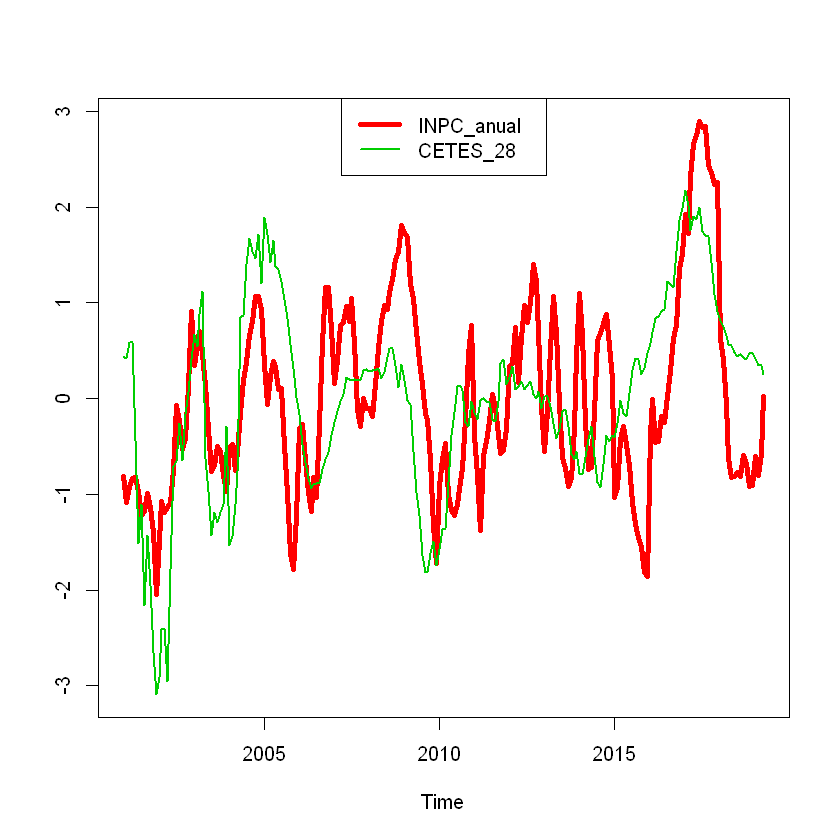

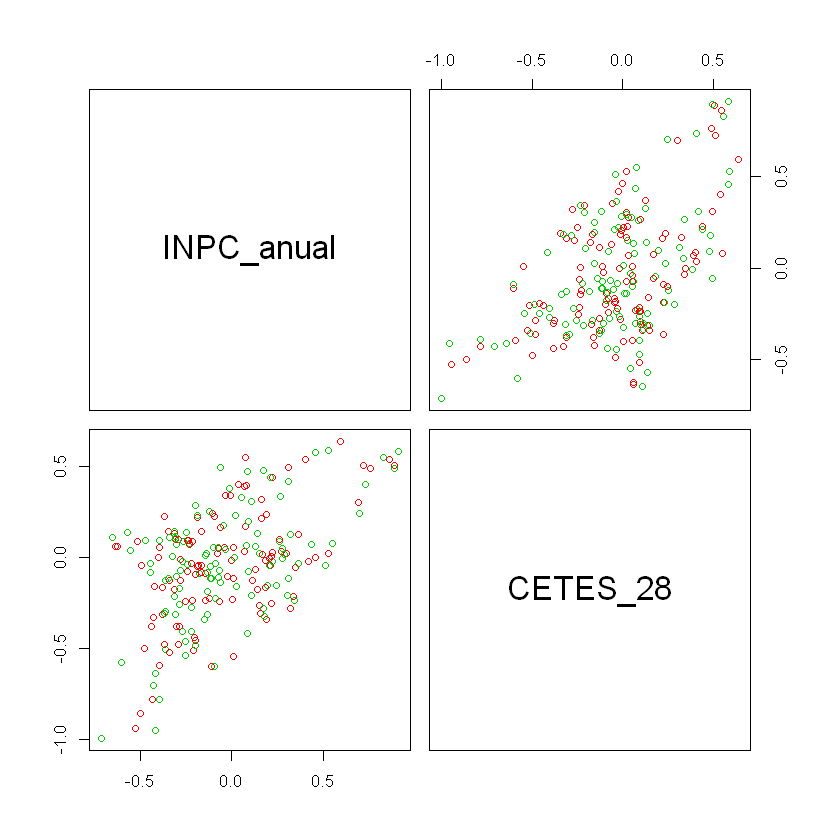

In [426]:
ts.plot(scale(inf1_12), col=c(2,rep(3,ncol(inf1_12)-1)), lwd=c(4,rep(2, ncol(inf1_12)-1)))
legend("top", colnames(inf1_12), col = c(2:3), lty = 1,lwd=c(4,rep(2, ncol(inf1_12)-1)))

pairs(inf1_12, col=c(2,rep(3,ncol(inf1_12)-1)))

# Model Estimation
Let's estimate the VAR Model, but first identify models lag order with selection criteria of AIC, HQ and SC.
According to the results, we estimate the VAR model as varINF 

In [427]:
p <- VARselect(inf1_12,lag.max=12, type = "const", season=12)$selection["HQ(n)"]
p
p1 <- VARselect(inf1_12,lag.max=12, type = "const", season=12)$selection["AIC(n)"]
p1
p2 <- VARselect(inf1_12,lag.max=12, type = "const", season=12)$selection["SC(n)"]
p2

HQ(n) 
   10

AIC(n) 
    10

SC(n) 
    2

In [428]:
#Chosen criteria: SC
#Estimate VAR
varINF <- VAR(inf1_12, p = p2, type = "const", season = 12)

#VAR summary
summary(varINF)


VAR Estimation Results:
Endogenous variables: INPC_anual, CETES_28 
Deterministic variables: const 
Sample size: 218 
Log Likelihood: 347.645 
Roots of the characteristic polynomial:
0.9265 0.629 0.629 0.09608
Call:
VAR(y = inf1_12, p = p2, type = "const", season = 12L)


Estimation results for equation INPC_anual: 
INPC_anual = INPC_anual.l1 + CETES_28.l1 + INPC_anual.l2 + CETES_28.l2 + const + sd1 + sd2 + sd3 + sd4 + sd5 + sd6 + sd7 + sd8 + sd9 + sd10 + sd11 

                Estimate Std. Error t value Pr(>|t|)    
INPC_anual.l1  1.2285796  0.0647331  18.979  < 2e-16 ***
CETES_28.l1    0.1766375  0.0823500   2.145   0.0332 *  
INPC_anual.l2 -0.3885102  0.0640704  -6.064 6.44e-09 ***
CETES_28.l2   -0.0908551  0.0831065  -1.093   0.2756    
const         -0.0014239  0.0084073  -0.169   0.8657    
sd1           -0.0025579  0.0409841  -0.062   0.9503    
sd2            0.0002900  0.0409797   0.007   0.9944    
sd3           -0.0012868  0.0404437  -0.032   0.9747    
sd4           -0.00

The Roots of the Characteristic polynomial tells us the unitary roots of the models. We've notice that are not above the unity, which is good and they decrease rapidly, wich is also a good signal.
Both linear regressions of Inflation and Treasury bonds are R² is 0.85 and 0.88 respectively with both a confidence interval of 99%
This is very good news to confirm their economic relation.

# Model Diagnostic Checking
First we make a test on residuals lookinf for p-values < 0.05
Then we test for Granger's causality

In [429]:
# Test on residuals
serial <- serial.test(varINF)
arch <- arch.test(varINF)
serial
arch


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object varINF
Chi-squared = 234.84, df = 56, p-value < 2.2e-16

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object varINF
Chi-squared = 234.84, df = 56, p-value < 2.2e-16




	ARCH (multivariate)

data:  Residuals of VAR object varINF
Chi-squared = 79.147, df = 45, p-value = 0.001252

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object varINF
Chi-squared = 79.147, df = 45, p-value = 0.001252



With a confidence level of 99% on the Pormanteau test, the hypothesis is accepted
With a  a confidence level of 99% on the ARCH test the hypothesis is accepted

In [430]:
# Granger's causality test
cau <- matrix(0, ncol(inf1_12), 1)
colnames(cau) <- "p.value"
rownames(cau) <- colnames(inf1_12)
for(i in 1 : ncol(inf1_12))
  cau[i,] <- causality(varINF, colnames(inf1_12)[i])$Granger$p.value

cau <- round(cau, 4)
cau

,p.value
INPC_anual,0.3774
CETES_28,0.0070


We've found that the past of CETES_28 is significant to INCP's causality. The other causality is non relevant.

# FORECASTING
Forecast the same number of lags=2

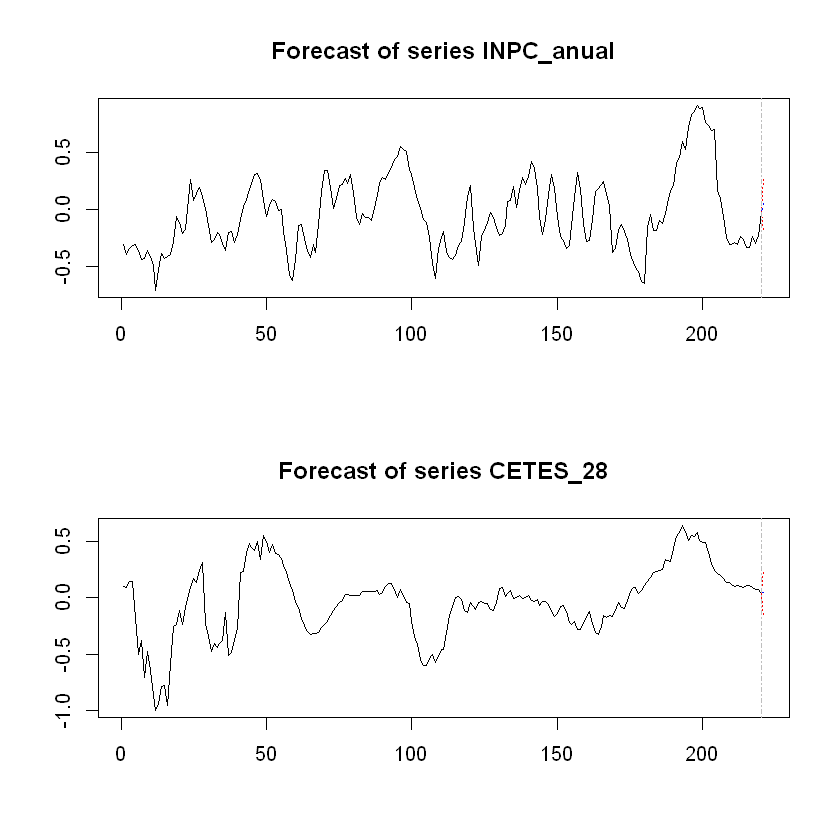

In [431]:
fore <- predict(varINF, n.ahead = 1)
plot(fore)

# Funciones respuesta impulso
La línea verde del impulso de respuesta especifia un 0.
La azul es la variable que sufre el Shock y tiene que converger otravez al 0. Y al corto plazo
Las variables no aplican para explicar la inflación


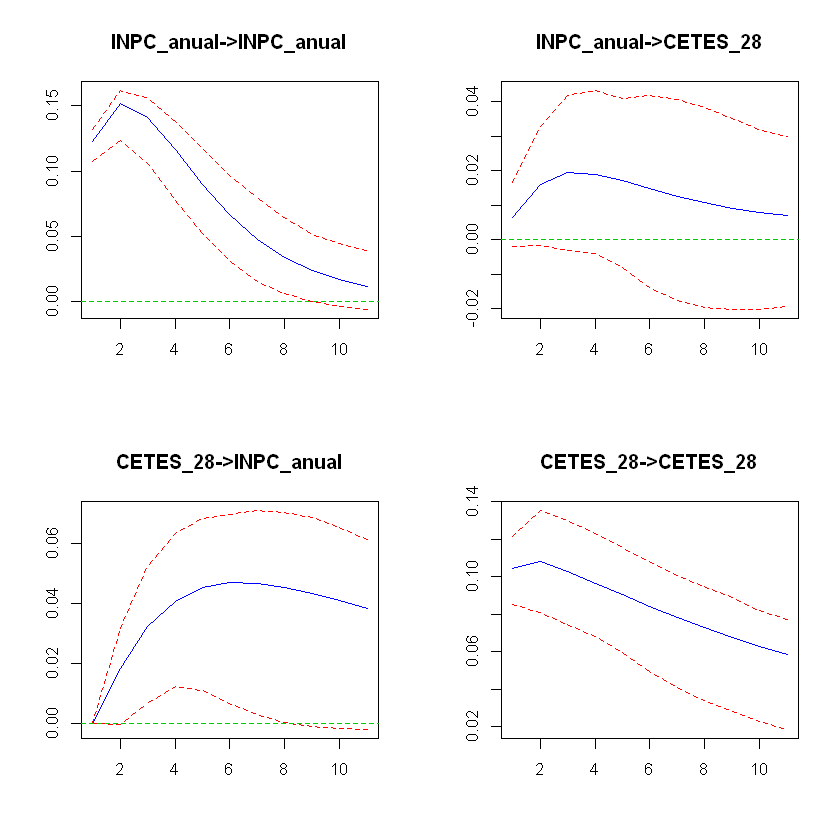

In [432]:
irff <- irf(varINF)
# plot
opp <- par(mfrow = c(2, 2))
for(j in 1 : ncol(inf1)){
  for(i in 1 : ncol(inf1)){
    mea <- irff$irf[[colnames(inf1)[j]]][,i]
    li <- irff$Lower[[colnames(inf1)[j]]][,i]
    ls <- irff$Upper[[colnames(inf1)[j]]][,i]
    mat_irf <- cbind(mea, li, ls)
    ts.plot(mat_irf, ylab = "", xlab = "", col = c(4, 2, 2), lty = c(1, 2, 2))
    abline(h = 0, lty = 2, col = 3)
    title(paste(colnames(inf1)[j], "->", colnames(inf1)[i], sep = ""))
  }
}
par(opp)

We've notice on INPC-> CETES a approximation to the convergence towards 0.

# Forecast
Now that we've prooved we have a stationary model, we've to forecast Next Month Inflation increase

In [433]:
fore$fcst[1:0]

,fcst,lower,upper,CI
INPC_anual.fcst,0.05029077,-0.1906638,0.2912453,0.2409546


# What's May's inflation estimate according to our VAR Model?

In [434]:
april<-last(inf1)
print(paste("May's inflation will be of", april[1:0]+ 0.05029077), 
      quote = FALSE)

[1] May's inflation will be of 4.46029077
